In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir
from scipy.stats import norm

In [2]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import load_spectral_types

In [3]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
name = "Spectral-Class"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [6]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/neighbour.hdf5']

In [7]:
df = vaex.open_many(files)
df

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,3.8327582915572105,-1.4313252511256076,12.86,12.043,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,5.353752577972431,-0.3480518575453191,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,M,--,nan,nan,--,3352.6962890625,2.923583984375,1.535400390625,0.0,gspphot,4.952499866485596,0.0055999755859375,0.0016002655029296875,0.0,gspphot,-0.21250000596046448,0.009899988770484924,0.004200011491775513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,8.146696274253422,87.63158693686636,-29.888253508420693,82.37710441190528,6.163959125900999,-43.94672854928757,0.03169385810834679,0.030353553205174022,-18.254316210789785,2.560346644879083,-0.04861264632954577,0.014719890215341326,nan,nan,nan,nan,nan,nan,nan,nan
1,3.8332158296206202,-1.4705536204592826,11.838,11.034,5769848452585664768,17.014656,-5.589498622907398,0.0140676545,16.070345820394742,0.016985236,7.3943173824366335,0.013919218,14.063171,15.032779,13.086449,5.335780523453254,-0.3835036530135326,133.2316,126.8792,135.253,0.4017,0.3763,0.5235,M,--,31.701446533203125,2.3632290363311768,gaia,3956.859130859375,13.845458984375,47.780029296875,0.0,gspphot,4.696700096130371,0.02349996566772461,0.017699718475341797,0.0,gspphot,-0.08190000057220459,0.11660000681877136,0.07380000036209822,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.8039999,6.182490735712269,135.23898803360157,-50.60262975233018,125.41514161576032,1.9055629007769193,16.907611885590025,0.014656890213292105,0.01647946313895594,10.838333843777704,1.2215283281100087,0.022974978420221552,0.009672832698179248,-1.8107602785067858,0.8845105570304012,33.4540332399622,2.1915794309798495,18.538438173876052,1.2794508991736029,27.87455437402087,1.7793592561903362
2,3.8346654651907417,-1.4144265544287782,9.935,9.111,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,5.361660249342902,-0.33288792556267294,nan,nan,nan,nan,nan,nan,M,--,31.392871856689453,0.6936047673225403,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.7300000190734863,0.04999995231628418,0.06000000238418579,0.0,gspspec,0.23999999463558197,0.03999999165534973,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.82400036,6.46166280113086,49.507104159283486,-16.17762322571451,46.789292247318365,86.96745942661094,-160.6847113959491,0.015268494877565559,0.015281674361303673,-37.706864686008544,20.408103522709055,-0.023837543870954808,0.013248471351061775,-45.89522257419966,0.22776876903148444,17.347869976575154,0.6555739390825701,-5.766928347540318,0.396504464103475,26.156869452442187,0.5222422058234985
3,3.83521967704142,-1.428977137509852,13.49,12.615,5772540538087138688,58.542484,-20.266122669434054,0.048241053,-54.922736075794205,0.04235118,6.585139220116088,0.038885877,16.387419,17.934364,15.180468,5.355146842172845,-0.3460749401539776,153.0864,152.3683,153.8725,0.5895,0.5819,0.5966,M,--,nan,nan,--,3415.5517578125,2.416259765625,2.121337890625,0.0,gspphot,4.859099864959717,0.0035996437072753906,0.00279998779296875,0.0,gspphot,-0.04259999841451645,0.006200000643730164,0.004199996590614319,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,n

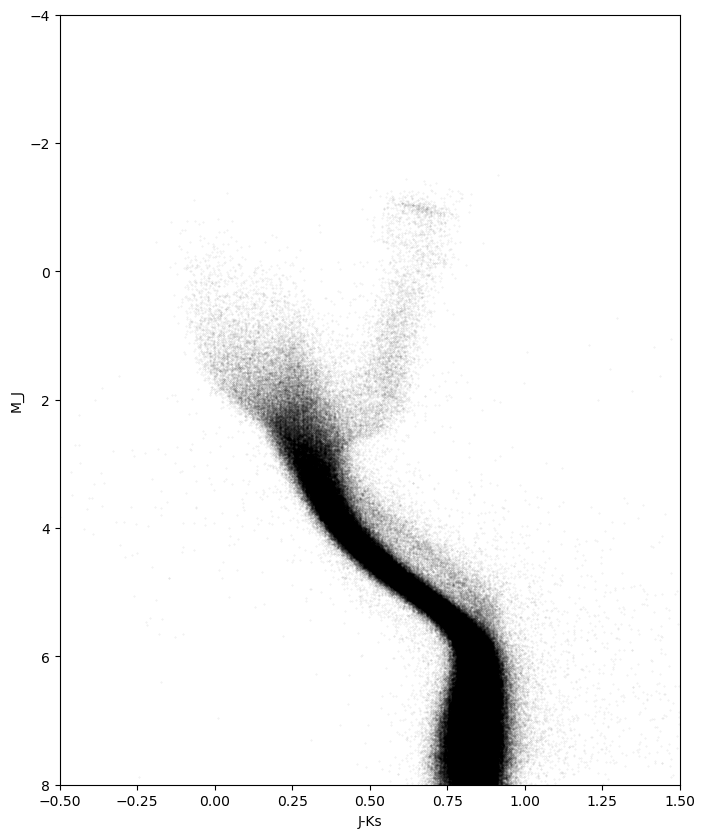

In [8]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel("J-Ks")
plt.ylabel("M_J")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
plt.show()

In [9]:
df_s = load_spectral_types()
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [10]:
jk = df_s["J-K"].to_numpy()
mj = df_s["M_J"].to_numpy()
check = mj < 5
jk = jk[check]
mj = mj[check]

In [11]:
up_x = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
up_y = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

low_x = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
low_y = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [12]:
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(up_x, up_y, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(low_x, low_y, fill_value="extrapolate")(jks)+0.15

In [13]:
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df.extract()

df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.8327582915572105,-1.4313252511256076,12.86,12.043,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,5.353752577972431,-0.3480518575453191,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,M,--,nan,nan,--,3352.6962890625,2.923583984375,1.535400390625,0.0,gspphot,4.952499866485596,0.0055999755859375,0.0016002655029296875,0.0,gspphot,-0.21250000596046448,0.009899988770484924,0.004200011491775513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,8.146696274253422,87.63158693686636,-29.888253508420693,82.37710441190528,6.163959125900999,-43.94672854928757,0.03169385810834679,0.030353553205174022,-18.254316210789785,2.560346644879083,-0.04861264632954577,0.014719890215341326,nan,nan,nan,nan,nan,nan,nan,nan,5.349391633886626,5.786087504740863
1,3.8332158296206202,-1.4705536204592826,11.838,11.034,5769848452585664768,17.014656,-5.589498622907398,0.0140676545,16.070345820394742,0.016985236,7.3943173824366335,0.013919218,14.063171,15.032779,13.086449,5.335780523453254,-0.3835036530135326,133.2316,126.8792,135.253,0.4017,0.3763,0.5235,M,--,31.701446533203125,2.3632290363311768,gaia,3956.859130859375,13.845458984375,47.780029296875,0.0,gspphot,4.696700096130371,0.02349996566772461,0.017699718475341797,0.0,gspphot,-0.08190000057220459,0.11660000681877136,0.07380000036209822,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.8039999,6.182490735712269,135.23898803360157,-50.60262975233018,125.41514161576032,1.9055629007769193,16.907611885590025,0.014656890213292105,0.01647946313895594,10.838333843777704,1.2215283281100087,0.022974978420221552,0.009672832698179248,-1.8107602785067858,0.8845105570304012,33.4540332399622,2.1915794309798495,18.538438173876052,1.2794508991736029,27.87455437402087,1.7793592561903362,5.300666050997734,5.745619174694639
2,3.8346654651907417,-1.4144265544287782,9.935,9.111,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,5.361660249342902,-0.33288792556267294,nan,nan,nan,nan,nan,nan,M,--,31.392871856689453,0.6936047673225403,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.7300000190734863,0.04999995231628418,0.06000000238418579,0.0,gspspec,0.23999999463558197,0.03999999165534973,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.82400036,6.46166280113086,49.507104159283486,-16.17762322571451,46.789292247318365,86.96745942661094,-160.6847113959491,0.015268494877565559,0.015281674361303673,-37.706864686008544,20.408103522709055,-0.023837543870954808,0.013248471351061775,-45.89522257419966,0.22776876903148444,17.347869976575154,0.6555739390825701,-5.766928347540318,0.396504464103475,26.156869452442187,0.5222422058234985,5.37541994827734,5.80830579846679
3,3.83521967704142,-1.428977137509852,13.49,12.615,5772540538087138688,58.542484,-20.266122669434054,0.048241053,-54.922736075794205,0.04235118,6.585139220116088,0.038885877,16.387419,17.934364,15.180468,5.355146842172845,-0.3460749401539776,153.0864,152.3683,153.8725,0.5895,0.5819,0.5966,M,--,nan,nan,--,3415.5517578125,2.416259765625,2.121337890625,0.0,gspphot,4.859099864959717,0.0035996437072753906,0.00279998779

In [14]:
# AG
# JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
# JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2
JK_lower = df_s[df_s['SpT'] == 'B8V']['J-K'].to_numpy()[0]
JK_upper = df_s[df_s['SpT'] == 'G5V']['J-K'].to_numpy()[0]
print(JK_lower, JK_upper)

mask = ((df_mask_65['JK'] > JK_lower)
          *(df_mask_65['JK'] < JK_upper)
          *(df_mask_65['M_J_lower'] < df_mask_65['M_J'])
          *(df_mask_65['M_J_upper'] > df_mask_65['M_J']))

df_AG = df_mask_65[mask].extract()
df_AG

-0.064 0.386


#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.1298

In [15]:
df_rv_nan = df_AG[df_AG.rv.isnan()]
none = len(df_rv_nan)

df_rv = df_AG.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
2,apogee,4139
5,gaia,52508
1,galah,453
4,lamost,581
3,rave,717
0,None,2075


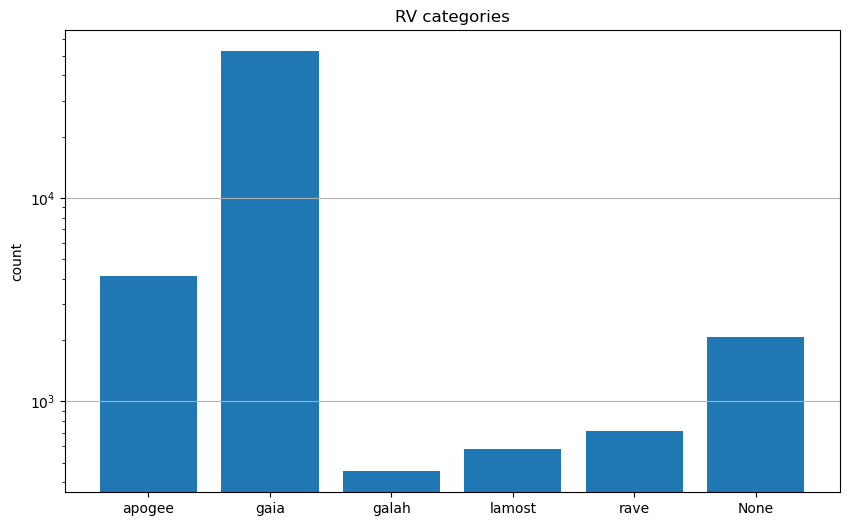

In [16]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

In [17]:
df_rv = df_AG[df_AG.rv.notnan()].extract()
df_rv

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.1298

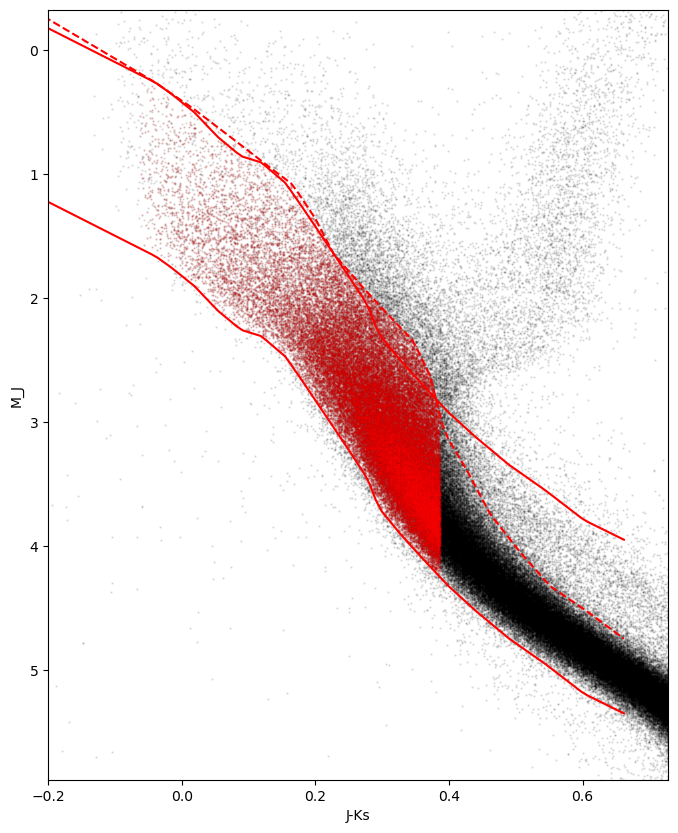

In [18]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
df_rv.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_upper-1.4, 'r')
plt.plot(jks, j_lower, 'r--')
plt.xlabel("J-Ks")
plt.ylabel("M_J")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

In [19]:
df_rv.export(join(data_dir, "AG-extend.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     3.32s =  0.1m =  0.0h  
 

In [5]:
df_rv = vaex.open(join(data_dir, "AG-extend.hdf5"))
df_rv

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.1298

In [6]:
# check Bensby et al (2014)
# Bensby, T., Feltzing, S., Oey, M.S. 2014. Exploring the Milky Way Stellar Disk: A Detailed Elmental Abundance Study of 714 F and G Dwarf Stars in the Solar Neighbourhood. Astronomy& Astrophysics
df_rv["u_LSR"] = df_rv["u"]# - 11.1
df_rv["v_LSR"] = df_rv["v"]# - 12.4
df_rv["w_LSR"] = df_rv["w"] + 7.25

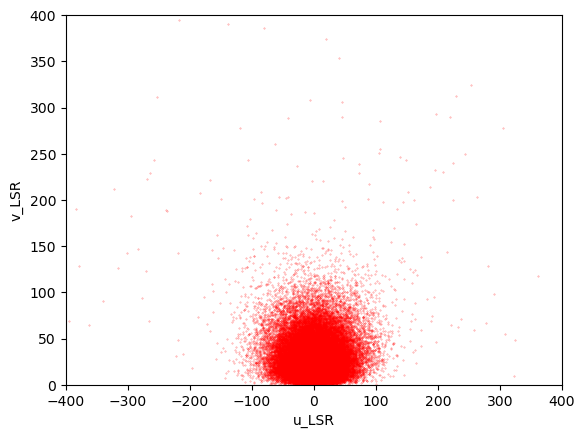

In [7]:
df_rv.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.5, s=0.1, length_check=False)
plt.xlabel("u_LSR")
plt.ylabel("v_LSR")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.show()

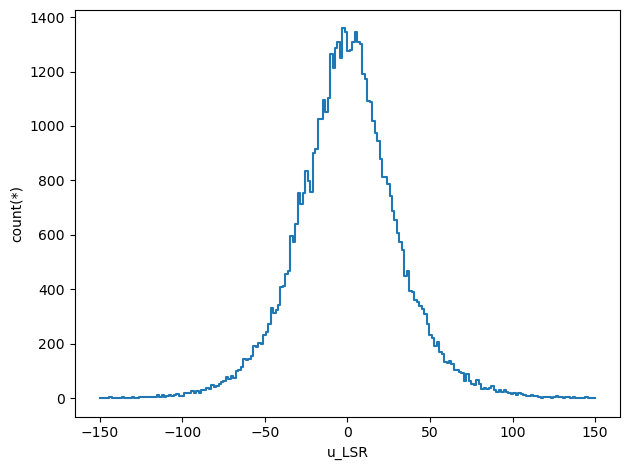

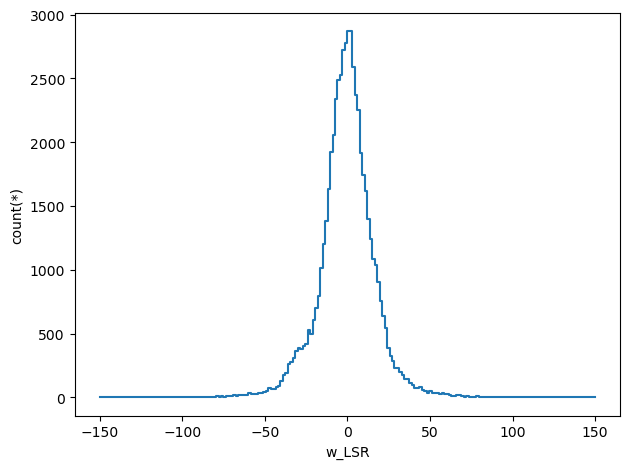

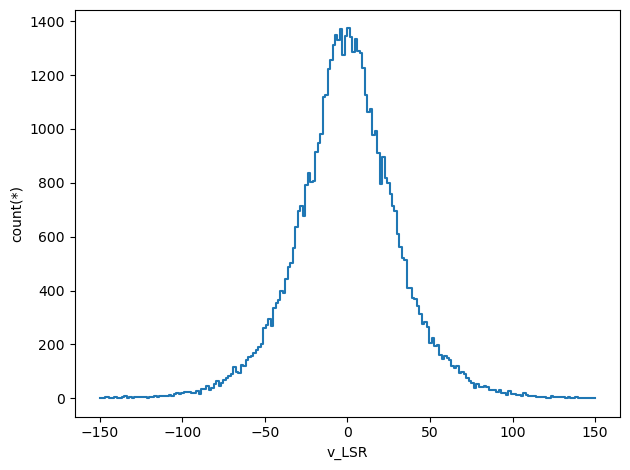

In [22]:
df_rv.viz.histogram("u_LSR", limits=[-150, 150], shape=200, show=True)
df_rv.viz.histogram("w_LSR", limits=[-150, 150], shape=200, show=True)
df_rv.viz.histogram("v_LSR", limits=[-150, 150], shape=200, show=True)

In [8]:
df_rv

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.0358850863

In [9]:
col_v = "rv"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()]
df_nan = df_nan.extract() if len(df_nan) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
if none != 0:
    df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,rv_cat,count
1,apogee,4139
4,gaia,52508
0,galah,453
3,lamost,581
2,rave,717


In [10]:
col_v = "feh"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,feh_cat,count
1,apogee,3917
3,gaia,32985
0,galah,336
2,lamost,5304
4,none,15856


In [11]:
col_v = "mh"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,mh_cat,count
1,apogee,3087
2,gspphot,47999
0,gspspec,6941
4,none,350
3,rave,21


In [12]:
col_v = "alphafe"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,alphafe_cat,count
0,galah,45
1,gspspec,50233
3,none,7409
2,rave,711


In [13]:
df_mh = df_rv[df_rv.mh.notnan()].extract() if len(df_rv[df_rv.mh.notnan()]) else []
df_mh

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.0358850863

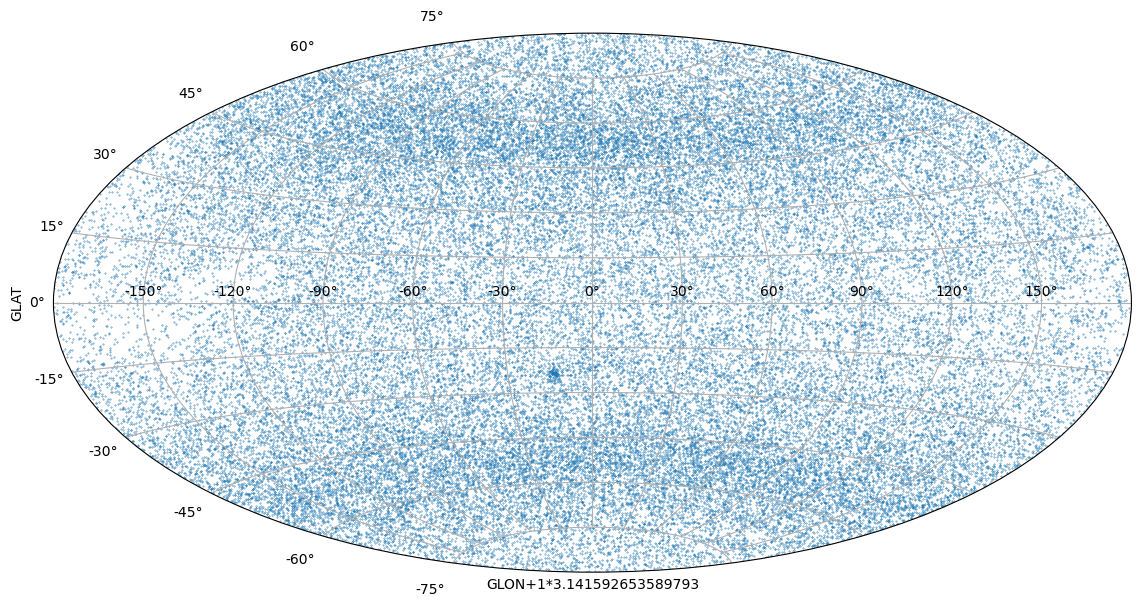

In [39]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_mh.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1, c="C0")
df_mh.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

In [14]:
df_mask = df_mh

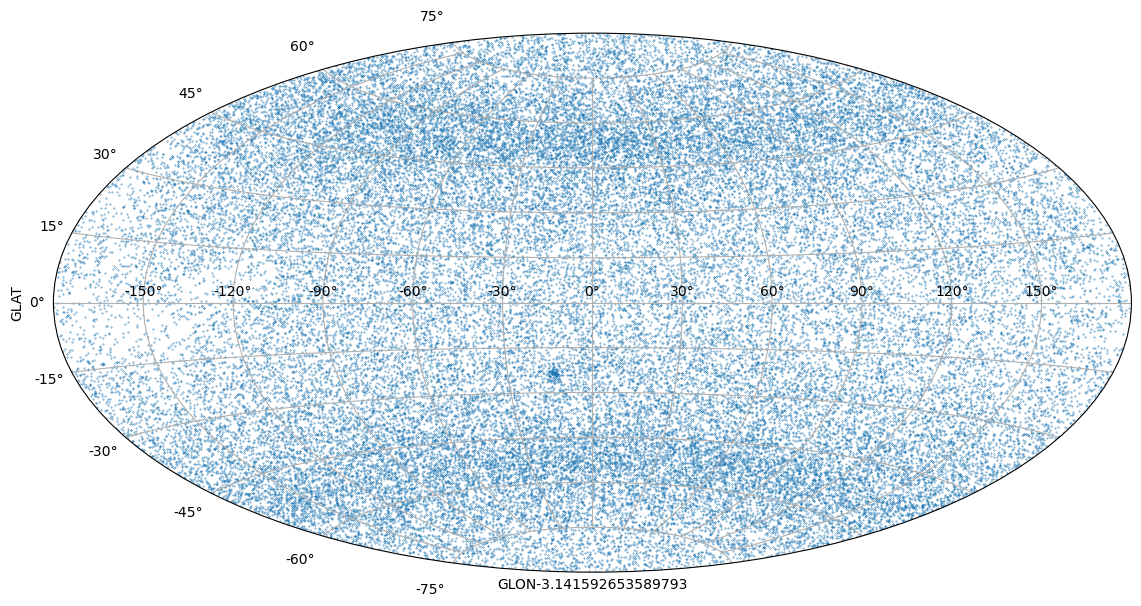

In [41]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
df_mask.viz.scatter("GLON-3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1)
plt.grid(True)
plt.show()

In [15]:
df_mask["f_D"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=16))
df_mask["f_TD"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=35))
df_mask["f_H"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=90))
df_mask

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603,7.858721834270301e-09,6.374642175046404e-08,1.4662847638509078e-09
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,1

In [16]:
df_mask["fTD_fD"] = df_mask["f_TD"]/df_mask["f_D"]
df_mask["fTD_fH"] = df_mask["f_TD"]/df_mask["f_H"]
df_mask

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603,7.858721834270301e-09,6.374642175046404e-08,1.4662847638509078e-09,8.111550846917465,43.47478970118099
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)


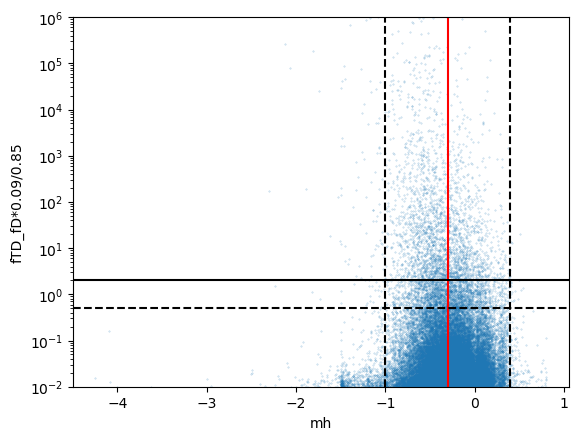

In [17]:
df_mask.viz.scatter("mh", "fTD_fD*0.09/0.85", length_check=False, s=0.1, alpha=0.4)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")

In [18]:
mh_D = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] < 0.5
D = mh_D & TD_D
df_mask["thin"] = D
df_mask

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603,7.858721834270301e-09,6.374642175046404e-08,1.4662847638509078e-09,8.111550846917465,43.47478970118099,False
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-

In [19]:
mh_TD = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] > 2
TD = mh_TD & TD_D
df_mask["thick"] = TD
df_mask

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603,7.858721834270301e-09,6.374642175046404e-08,1.4662847638509078e-09,8.111550846917465,43.47478970118099,False,False
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.110000001266

(0.01, 10000.0)

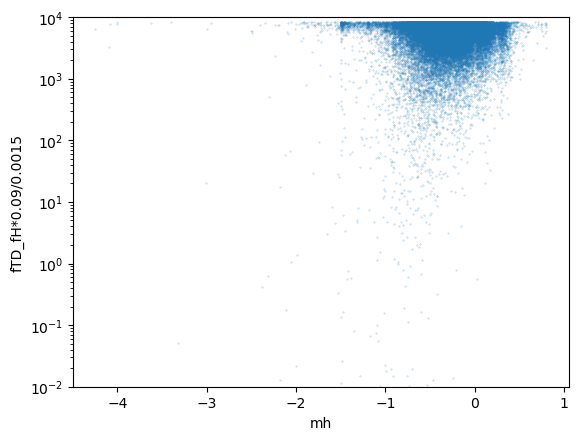

In [47]:
df_mask.viz.scatter("mh", "fTD_fH*0.09/0.0015", length_check=False, s=0.1, alpha=0.4)
plt.yscale("log")
plt.ylim(1e-2, 1e4)

In [20]:
TD_H = 0.09/0.0015*df_mask["fTD_fH"] < 1
df_mask["halo"] = TD_H
df_mask

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007,-53.995356445594005,11.544335820473439,48.05546450535603,7.858721834270301e-09,6.374642175046404e-08,1.4662847638509078e-09,8.111550846917465,43.47478970118099,False,False,False
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.149999998509883

In [21]:
df_thin = df_mask[df_mask["thin"]].extract()
df_thick = df_mask[df_mask["thick"]].extract()
df_halo = df_mask[df_mask["halo"]].extract()


In [22]:
intermediate = df_mask["halo"] | df_mask["thick"] | df_mask["thin"]
intermediate = ~intermediate
df_intermediate = df_mask[intermediate].extract()

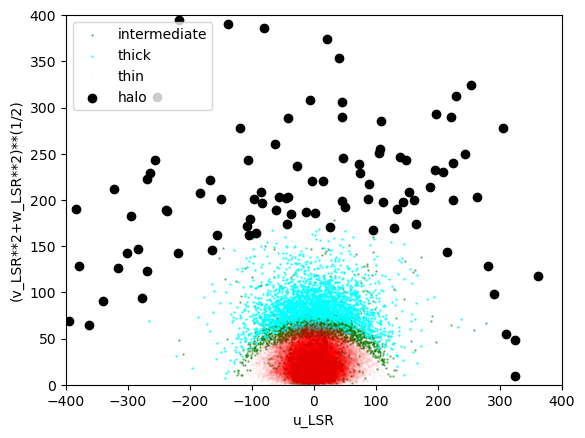

In [23]:
df_intermediate.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("u_LSR")
plt.ylabel("(v_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

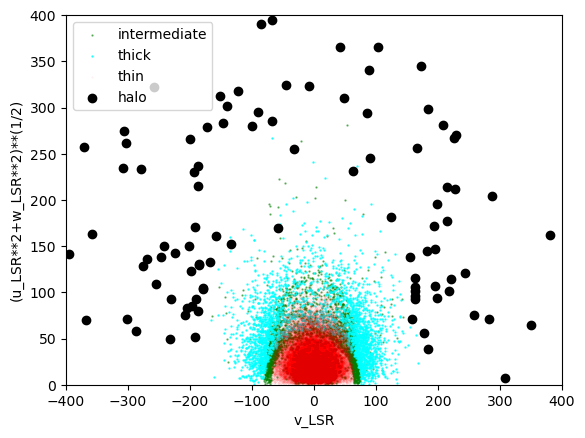

In [24]:
df_intermediate.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("v_LSR")
plt.ylabel("(u_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

In [ ]:
df_intermediate.viz.scatter("v_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("u_LSR")
plt.ylabel("(v_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

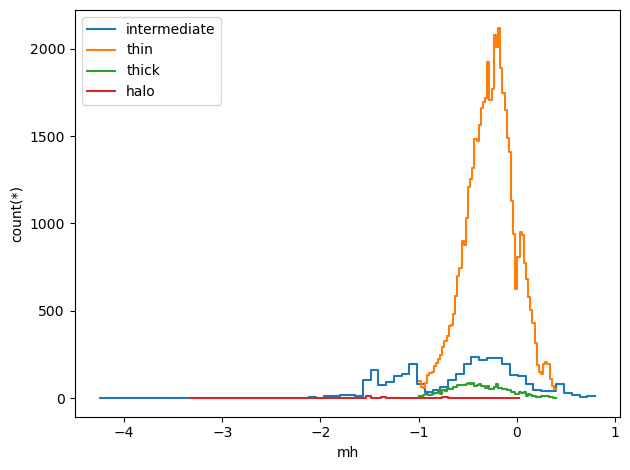

In [25]:
df_intermediate.viz.histogram("mh", label="intermediate")
df_thin.viz.histogram("mh", label="thin")
df_thick.viz.histogram("mh", label="thick")
df_halo.viz.histogram("mh", label="halo")
plt.legend()

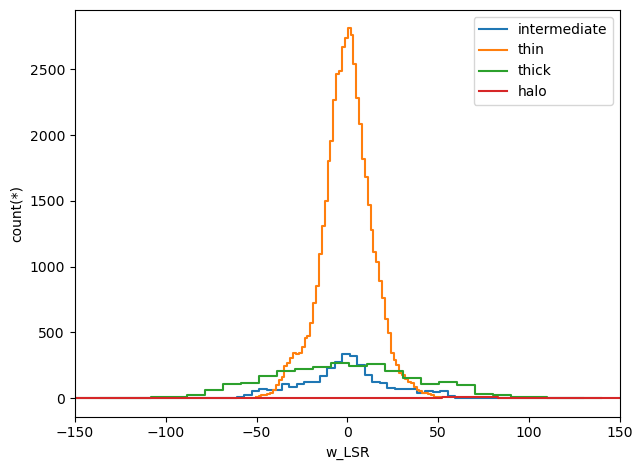

In [26]:
df_intermediate.viz.histogram("w_LSR", label="intermediate")
df_thin.viz.histogram("w_LSR", label="thin")
df_thick.viz.histogram("w_LSR", label="thick")
df_halo.viz.histogram("w_LSR", label="halo")
plt.xlim(-150, 150)
plt.legend()

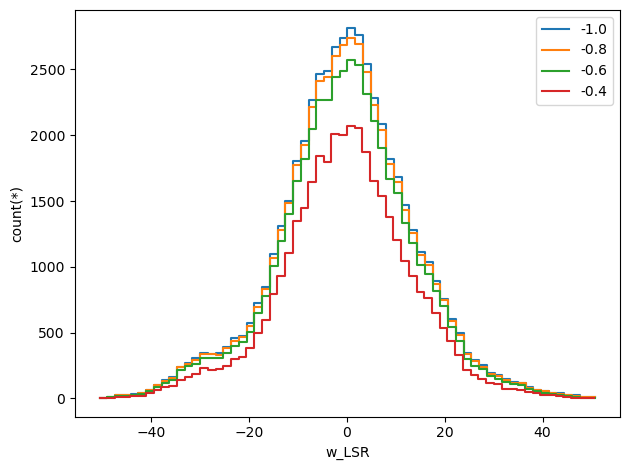

In [36]:
for mh in np.arange(-1, -0.3, 0.2):
    df_thin.filter("mh > {}".format(mh)).viz.histogram("w_LSR", label=f"{mh:0.1f}")
plt.legend()

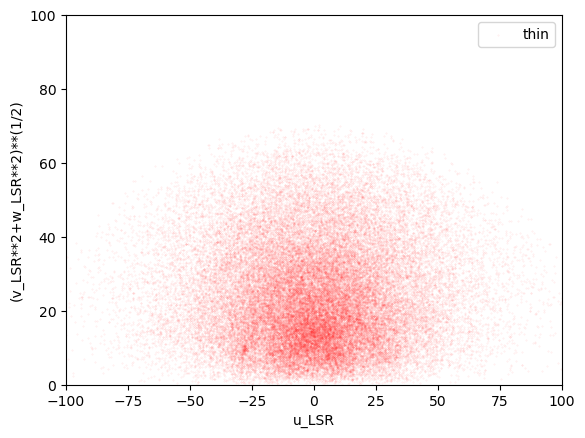

In [54]:
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
plt.xlim(-100, 100)
plt.ylim(0, 100)
plt.legend()
plt.show()

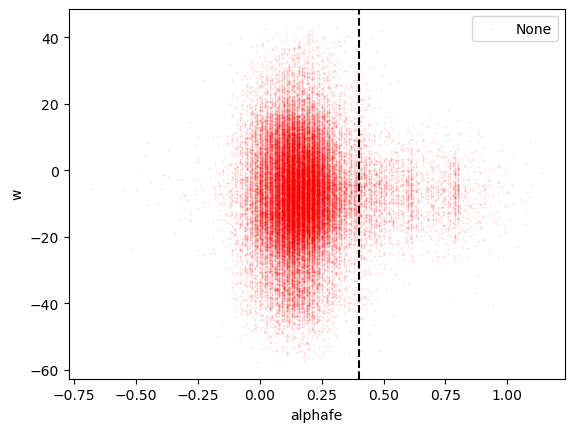

In [55]:
df_thin.viz.scatter("alphafe", "w", c='r', alpha=0.1, s=0.3, length_check=False)
# plt.xlim(-100, 100)
# plt.ylim(-100, 100)
plt.axvline(0.4, c="k", ls="--")
plt.legend()
plt.show()

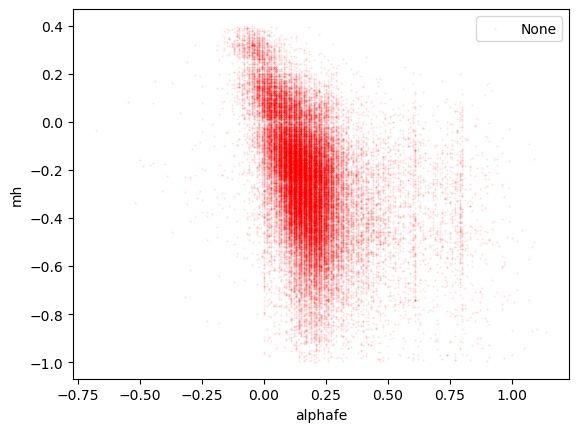

In [56]:
df_thin.viz.scatter("alphafe", "mh", c='r', alpha=0.1, s=0.3, length_check=False)
# plt.xlim(-100, 100)
# plt.ylim(-100, 100)
# plt.axvline(0.4, c="k", ls="--")
plt.legend()
plt.show()

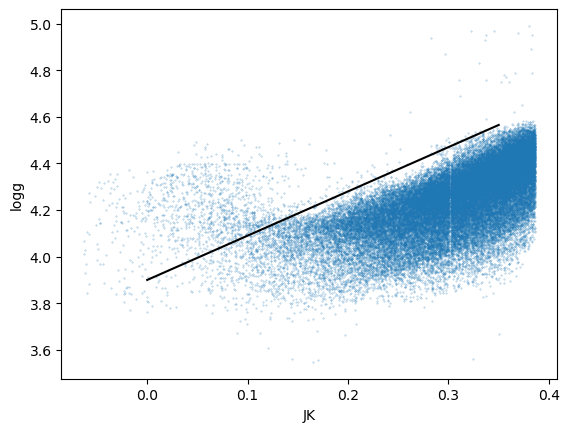

In [58]:
x = np.linspace(0, 0.35)
a = 1.9
b = 3.9
y = a*x+b
df_thin.viz.scatter("JK", "logg", s=0.1, alpha=0.5, length_check=False)
plt.plot(x, y, c="k")

In [59]:
df_thin.export(join(data_dir, "thin-AG-extended.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     2.68s =  0.0m =  0.0h   
 